In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('dataset.csv')

In [3]:
data.shape

(918, 12)

In [4]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
# features cardinality
data.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [7]:
# null data
data.isnull().sum().sort_values(ascending=False)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
# rename labels
data['FastingBS'][data['FastingBS']==0]= '<120mg/dl'
data['FastingBS'][data['FastingBS']==1]= '>120mg/dl'

data['HeartDisease'][data['HeartDisease']==0]= 'N'
data['HeartDisease'][data['HeartDisease']==1]= 'Y'

In [9]:
# Group features by dtpye

# numerical features
numerical_features= ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# categorial features
categorical_features= ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

In [10]:
# continuous features quality report
pd.set_option('display.float','{:.2f}'.format)
data[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.00,53.51,9.43,28.00,47.00,54.00,60.00,77.00
RestingBP,918.00,132.40,18.51,0.00,120.00,130.00,140.00,200.00
Cholesterol,918.00,198.80,109.38,0.00,173.25,223.00,267.00,603.00
MaxHR,918.00,136.81,25.46,60.00,120.00,138.00,156.00,202.00
Oldpeak,918.00,0.89,1.07,-2.60,0.00,0.60,1.50,6.20


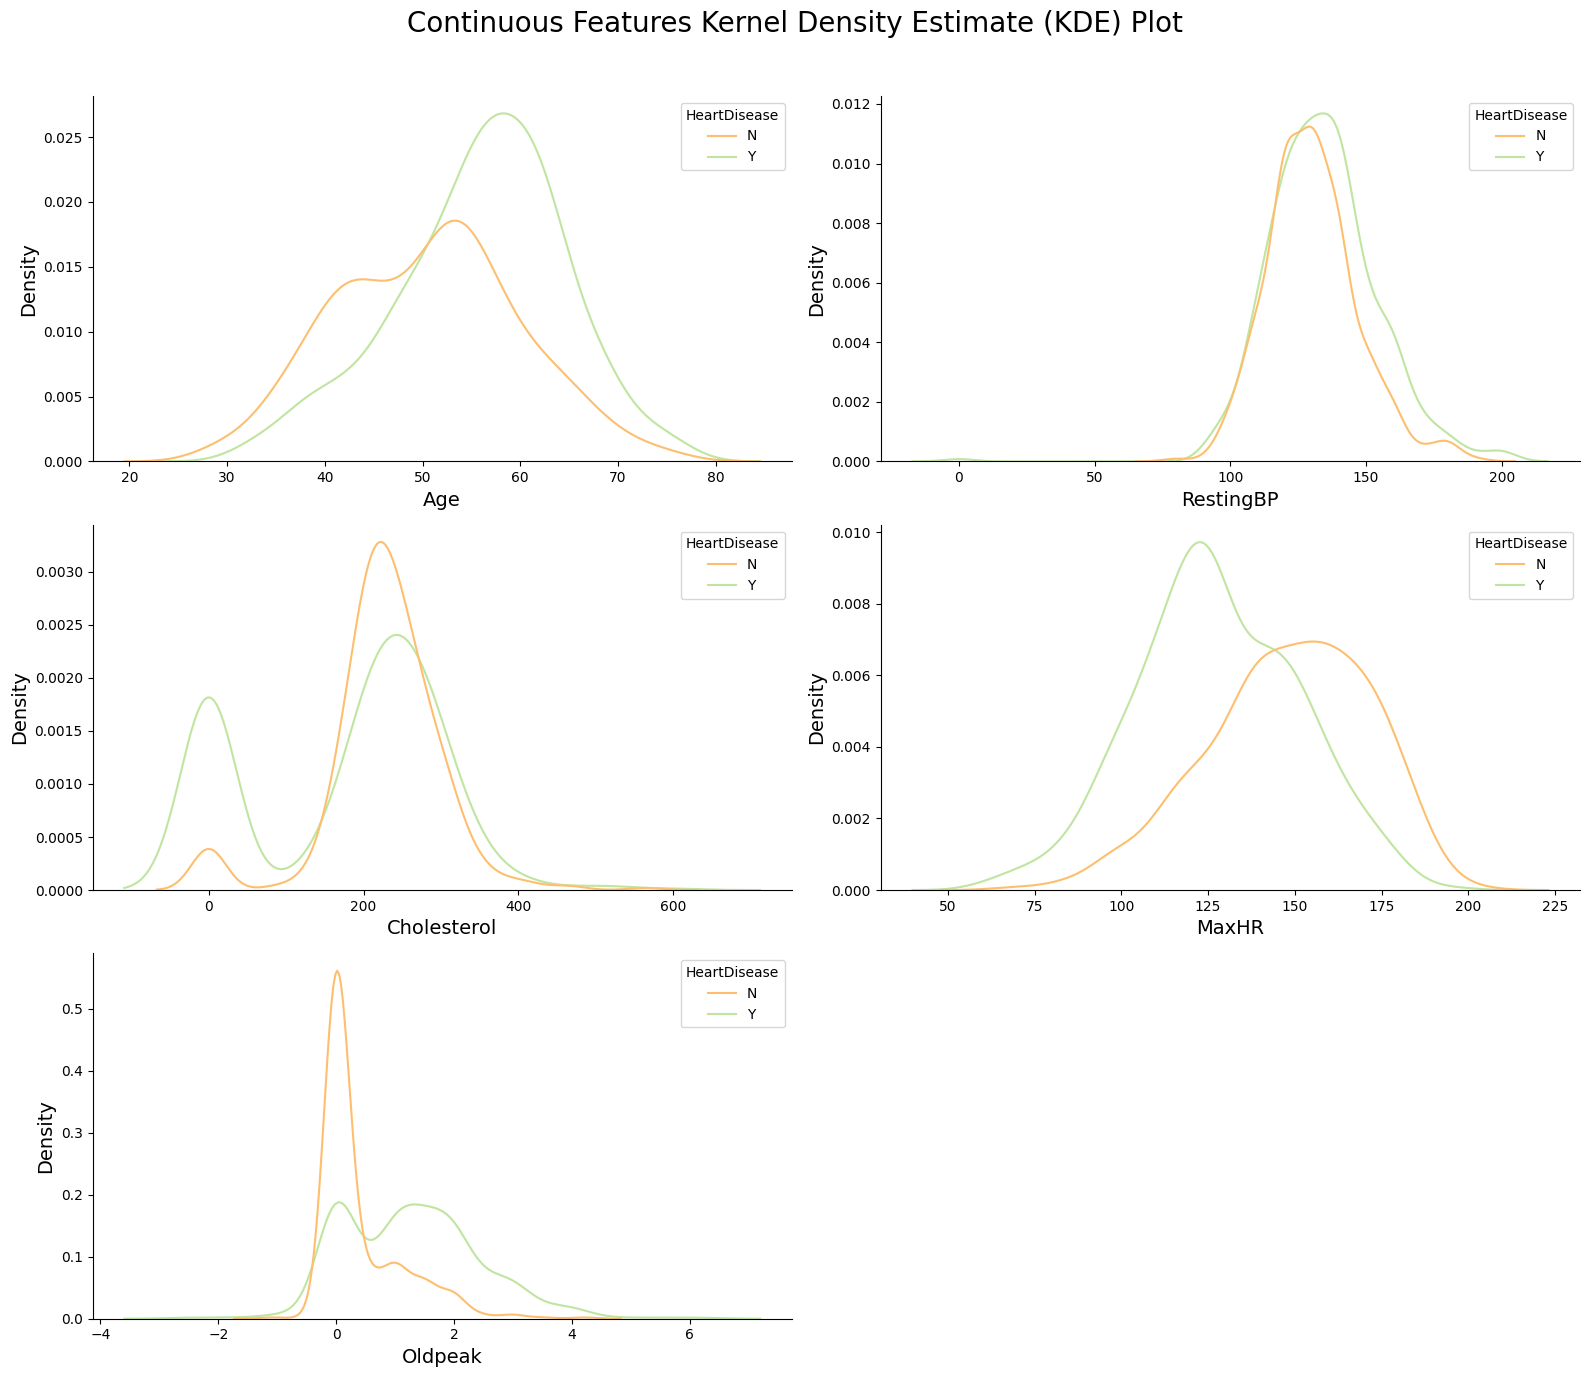

In [11]:
# visualizing continuous features distribution
L= len(numerical_features)
ncol= 2
nrow= int(np.ceil(L/ncol))
remove_last= (nrow * ncol) - L

fig, axes = plt.subplots(nrow, ncol, figsize=(16, 14))   
fig.subplots_adjust(top=0.92)
axes= axes.flatten()

# Hide empty subplots if any
if remove_last > 0:
    for j in range(1, remove_last + 1):
        axes[-j].set_visible(False)

# Plot each KDE
for i, col in enumerate(numerical_features):
    ax = axes[i]
    sns.kdeplot(data=data, x=col, hue="HeartDisease", palette='Spectral', ax=ax)
    ax.set_xlabel(col, fontsize=14)
    ax.set_ylabel("Density", fontsize=14)
    sns.despine(ax=ax)
plt.suptitle('Continuous Features Kernel Density Estimate (KDE) Plot', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

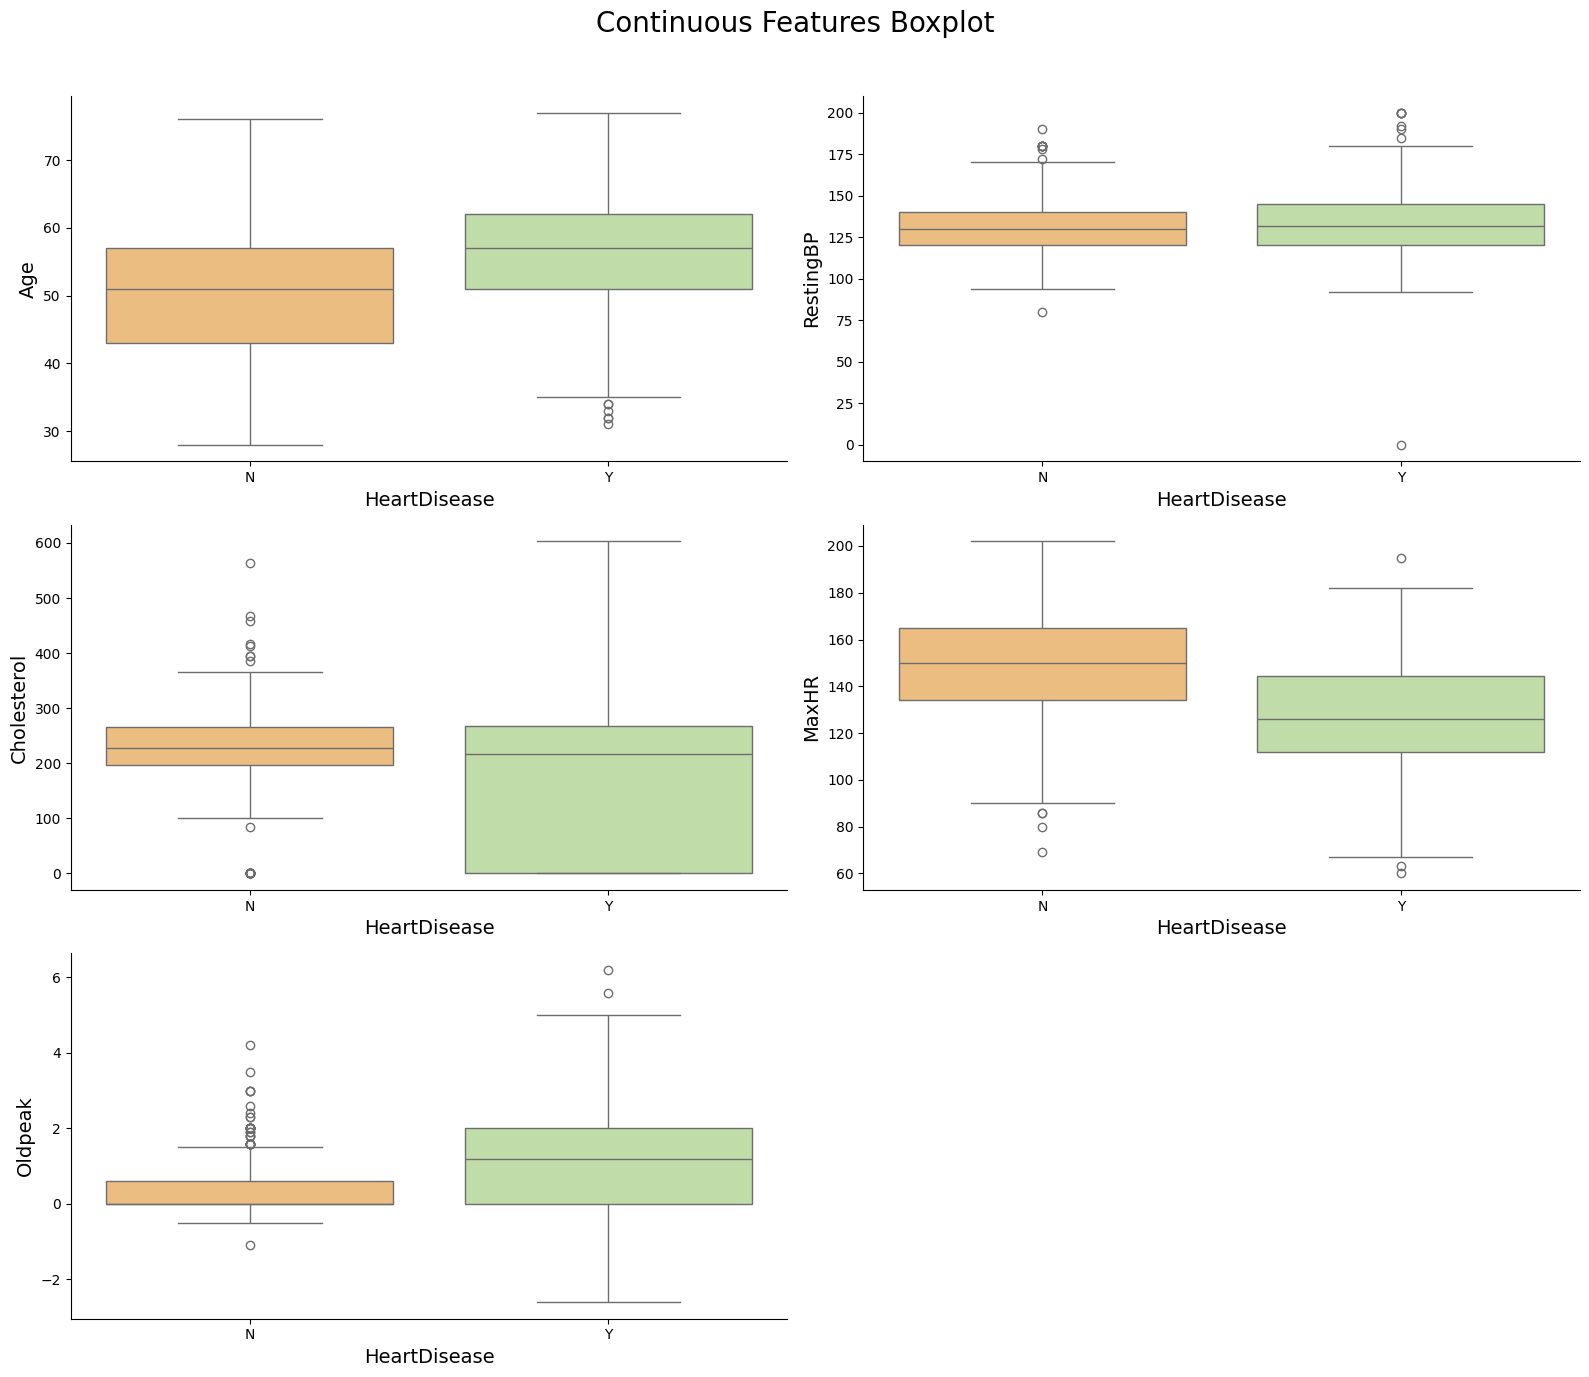

In [12]:
# continuous features boxplot
L = len(numerical_features)
ncol= 2
nrow= int(np.ceil(L/ncol))
remove_last= (nrow * ncol) - L

fig, axes = plt.subplots(nrow, ncol, figsize=(16, 14))   
fig.subplots_adjust(top=0.92)
axes= axes.flatten()

# Hide unused subplots
if remove_last > 0:
    for j in range(1, remove_last + 1):
        axes[-j].set_visible(False)

# Create boxplots
for i, col in enumerate(numerical_features):
    ax= axes[i]
    sns.boxplot(data=data, x='HeartDisease', y=col, palette='Spectral', ax=ax)
    ax.set_xlabel('HeartDisease', fontsize=14)
    ax.set_ylabel(col, fontsize=14)
    sns.despine(ax=ax)
plt.suptitle('Continuous Features Boxplot', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

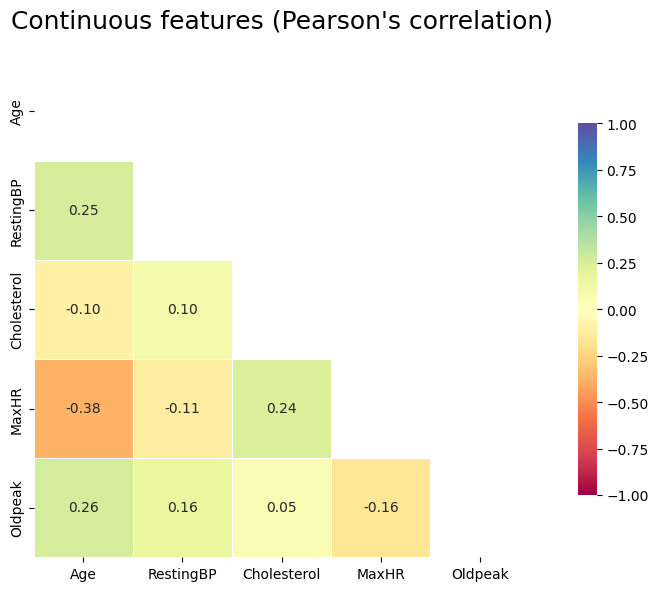

In [13]:
# pearson's correlation
num_df= data[numerical_features]
corr= num_df.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 6))
cmap = sns.color_palette(palette='Spectral', as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1.0, vmax=1.0,center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Continuous features (Pearson's correlation)",fontsize=18, y= 1.05);

plt.tight_layout()
plt.show()

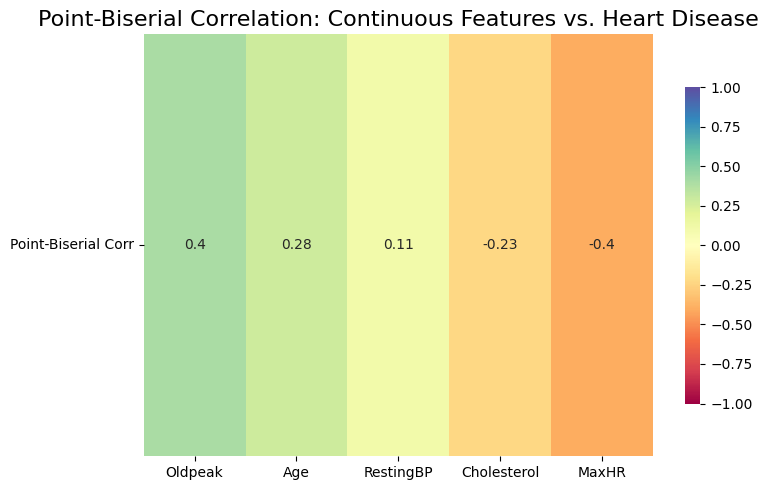

In [14]:
# point_biserial correlation

num_target = ['Age', 'Cholesterol', 'RestingBP', 'MaxHR','Oldpeak']
target = 'HeartDisease'

data['HeartDisease'] = data['HeartDisease'].replace({'N': 0, 'Y': 1}).astype(int)

pbs_scores = {
    feature: stats.pointbiserialr(data[target], data[feature])[0]
    for feature in num_target
}

# Convert to DataFrame for visualization
pbs_df = pd.DataFrame.from_dict(pbs_scores, orient='index', columns=['Point-Biserial Corr'])
pbs_df = pbs_df.sort_values(by='Point-Biserial Corr', ascending=False)

# Plotting
plt.figure(figsize=(8, 5))
sns.heatmap(pbs_df.T, annot=True, cmap='Spectral', center=0, vmin=-1, vmax=1, cbar_kws={"shrink": 0.75})
plt.title("Point-Biserial Correlation: Continuous Features vs. Heart Disease", fontsize=16)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


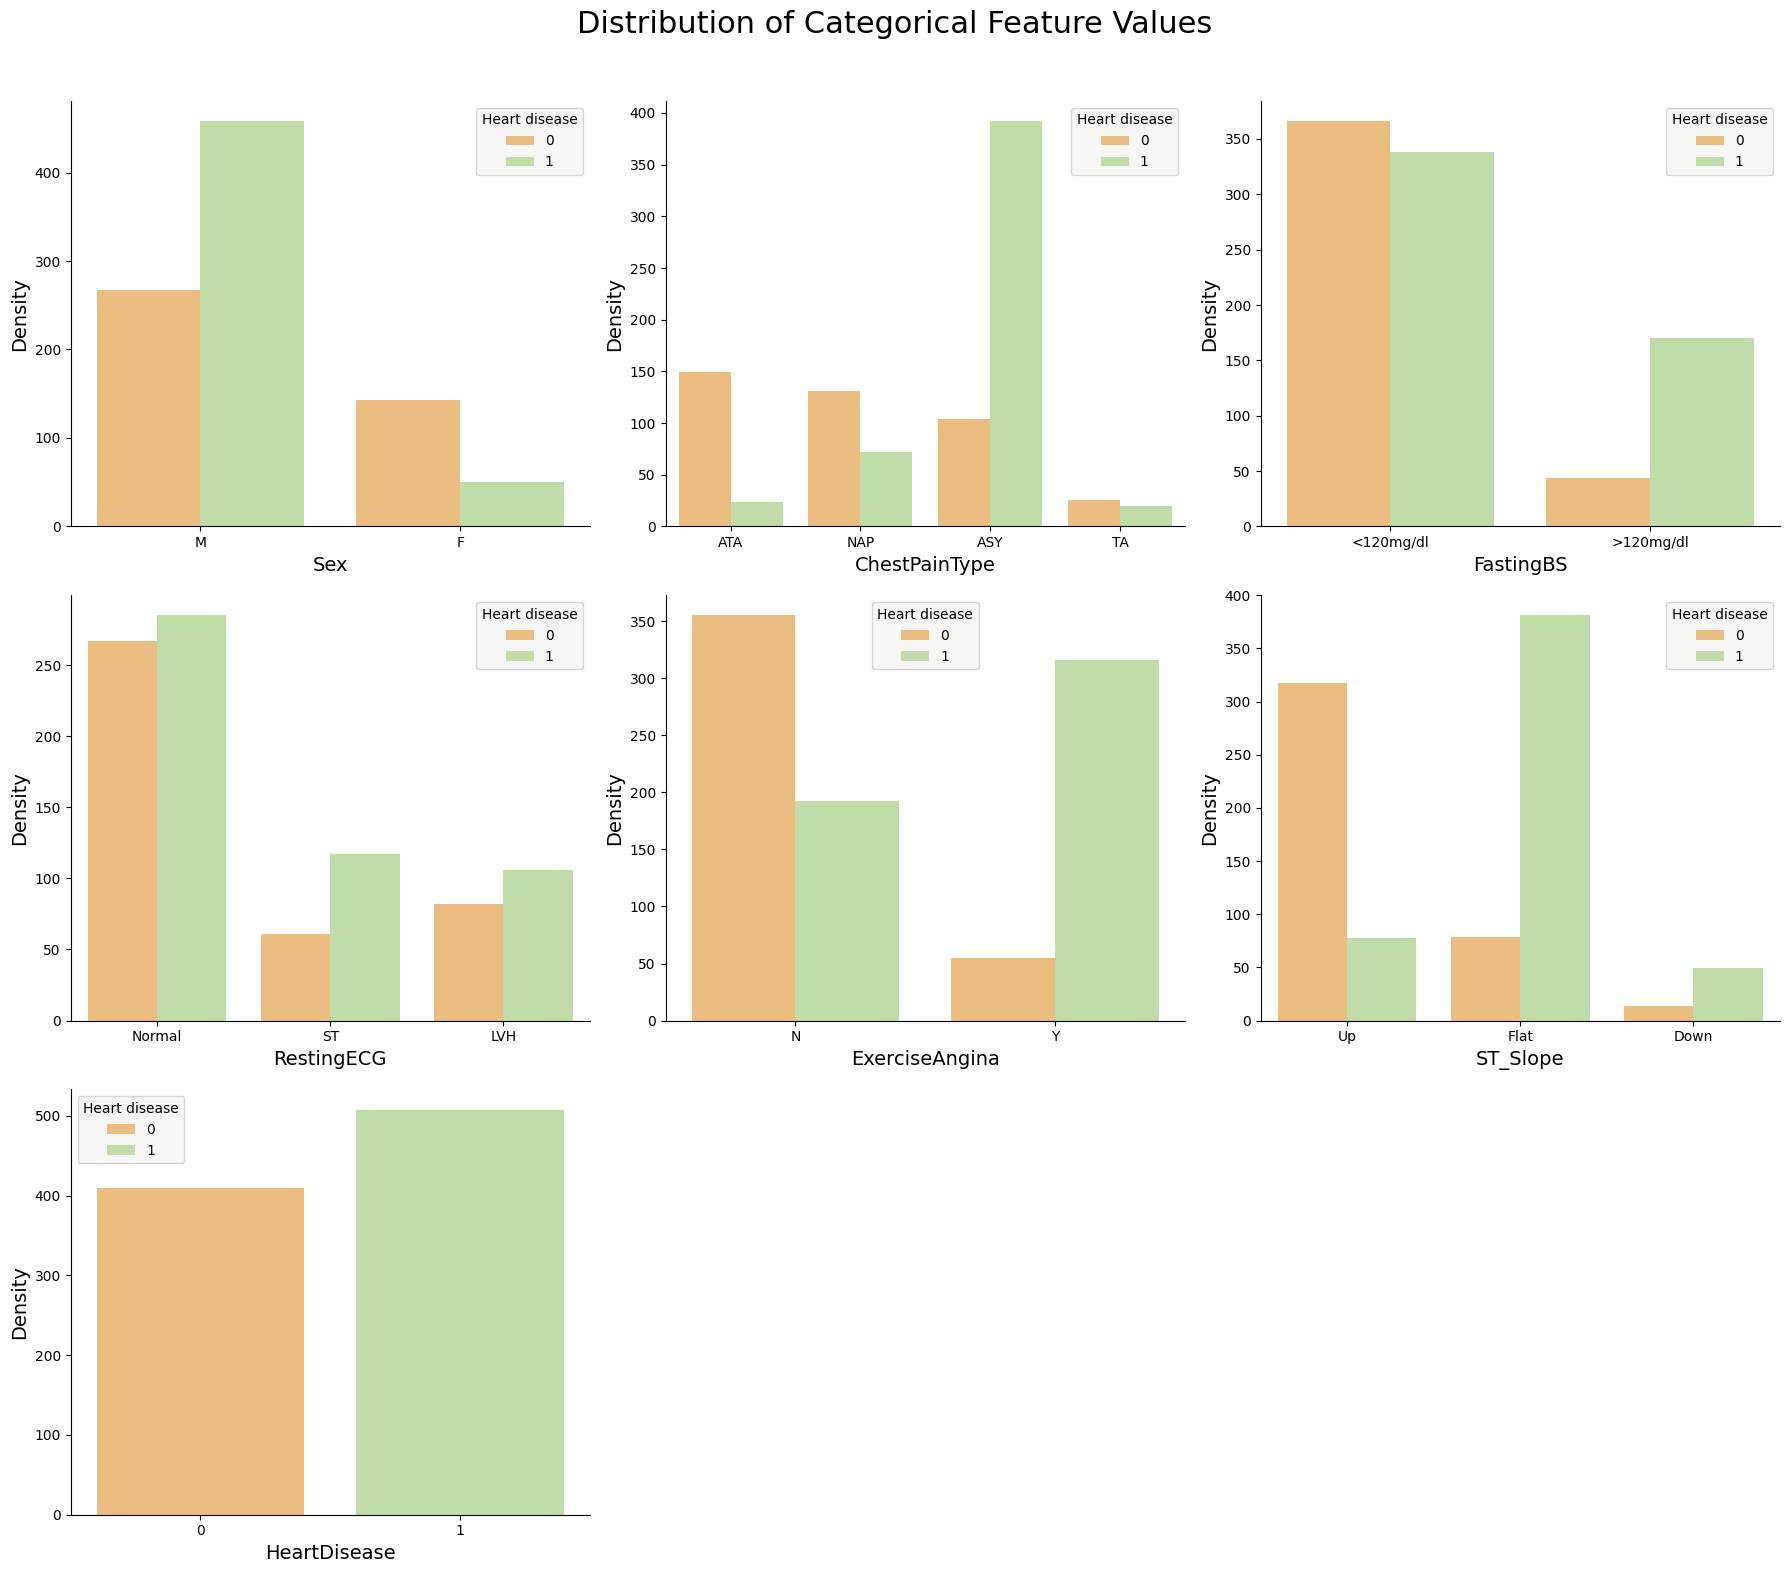

In [15]:
L= len(categorical_features)
ncol= 3
nrow= int(np.ceil(L/ncol))
remove_last= (nrow * ncol) - L

fig, axes = plt.subplots(nrow, ncol, figsize=(18, 16))   
fig.subplots_adjust(top=0.92)
axes= axes.flatten()

# Hide empty subplots if any
if remove_last > 0:
    for j in range(1, remove_last + 1):
        axes[-j].set_visible(False)

# Plot each KDE
for i, col in enumerate(categorical_features):
    ax = axes[i]
    sns.countplot(data=data, x=col, hue="HeartDisease", palette='Spectral', ax=ax)
    ax.set_xlabel(col, fontsize=14)
    ax.set_ylabel("Density", fontsize=14)
    ax.legend(title="Heart disease", facecolor='#F6F5F4')
    sns.despine(ax=ax)
plt.suptitle('Distribution of Categorical Feature Values', fontsize=22)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


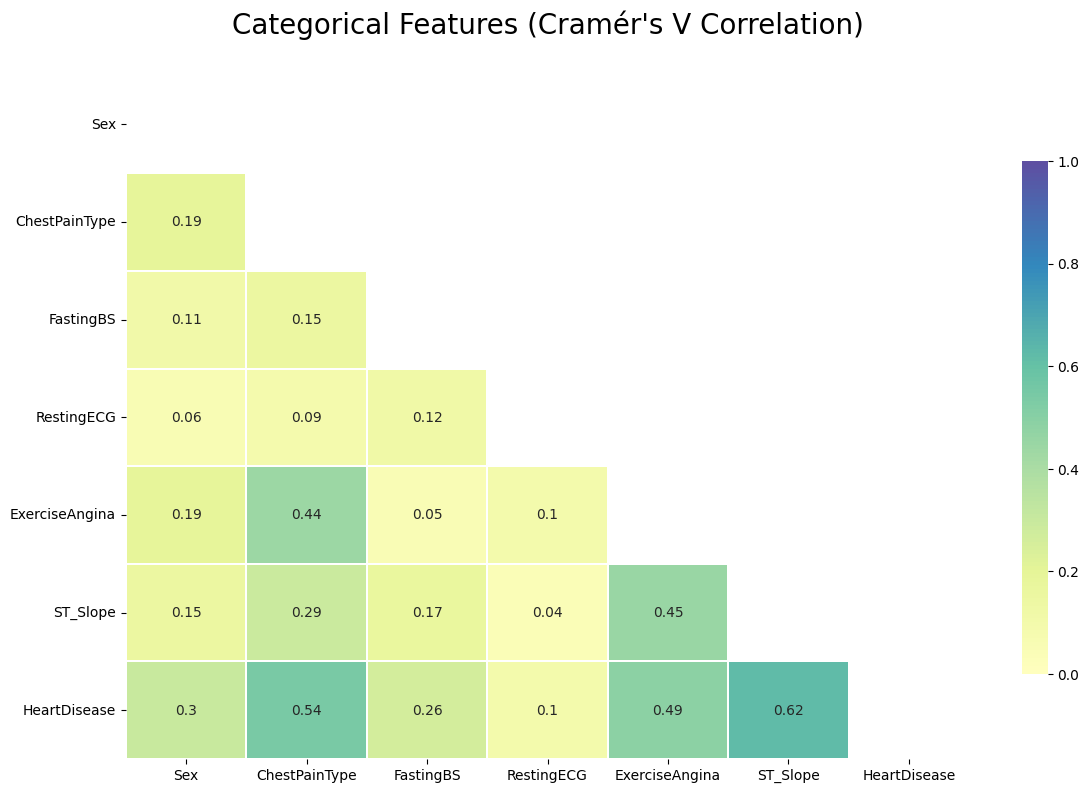

In [16]:
# cramer's v correlation
def cramers_v(x, y): 
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    
    # Bias correction as per Bergsma and Wicher, 2013
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))  
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    
    denom = min((kcorr - 1), (rcorr - 1))
    if denom == 0:
        return np.nan  # Avoid division by zero
    
    return np.sqrt(phi2corr / denom)

# Select categorical features dataframe
cat_df = data[categorical_features]

# Calculate Cramér’s V matrix
rows = []
for x in cat_df.columns:
    col = []
    for y in cat_df.columns:
        cramers = cramers_v(cat_df[x], cat_df[y])
        col.append(round(cramers, 2) if not np.isnan(cramers) else np.nan)
    rows.append(col)

cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns=cat_df.columns, index=cat_df.columns)

# Plotting the heatmap
mask = np.triu(np.ones_like(df, dtype=bool))
corr = df.mask(mask)

plt.figure(figsize=(12, 8))
cmap = sns.color_palette('Spectral', as_cmap=True)

sns.heatmap(
    corr, 
    mask=mask, 
    cmap=cmap, 
    vmin=0, vmax=1, 
    center=0, 
    annot=True, 
    square=False, 
    linewidths=0.01, 
    cbar_kws={"shrink": 0.75}
)

plt.title("Categorical Features (Cramér's V Correlation)", fontsize=20, y=1.05)
plt.tight_layout()
plt.show()